In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [83]:
df = pd.read_csv("../data/dataset_HR3.csv")

In [84]:
df.columns

Index(['Sr. No. ', 'previous organisation1', 'previous organisation2',
       'previous organisation3', 'previous organisation_months1',
       'previous organisation_months2', 'previous organisation_months3',
       'salaray', 'position_grade', 'left_company'],
      dtype='object')

In [85]:
df

,Sr. No.,previous organisation1,previous organisation2,previous organisation3,previous organisation_months1,previous organisation_months2,previous organisation_months3,salaray,position_grade,left_company
0,1,2,3,1,14,49,51,1,3,0
1,2,2,1,3,4,13,18,1,1,1
2,3,1,2,3,36,16,41,2,1,0
3,4,1,3,2,24,9,38,2,3,0
4,5,1,3,2,25,21,37,3,1,0
5,6,1,2,3,50,48,32,2,2,0
6,7,2,3,1,31,10,28,2,4,0
7,8,1,3,2,2,26,7,1,4,1
8,9,2,3,1,56,16,10,2,2,0
9,10,1,2,3,10,19,45,1,4,1


In [86]:
df.shape

(100, 10)

In [87]:
df.left_company.value_counts()

0    63
1    37
Name: left_company, dtype: int64

In [88]:
ab = df[df.salaray==2]

In [89]:
ab.left_company.value_counts()

0    25
1     8
Name: left_company, dtype: int64

In [90]:
df.describe()

,Sr. No.,previous organisation1,previous organisation2,previous organisation3,previous organisation_months1,previous organisation_months2,previous organisation_months3,salaray,position_grade,left_company
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.370000,2.250000,2.38000,20.760000,23.850000,31.110000,1.950000,2.400000,0.370000
std,29.011492,0.505625,0.687184,0.82609,12.788189,12.355324,18.184739,0.821123,1.110101,0.485237
min,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,25.750000,1.000000,2.000000,2.00000,12.000000,15.000000,14.750000,1.000000,1.000000,0.000000
50%,50.500000,1.000000,2.000000,3.00000,19.500000,22.000000,31.500000,2.000000,2.000000,0.000000
75%,75.250000,2.000000,3.000000,3.00000,30.250000,32.250000,48.250000,3.000000,3.000000,1.000000
max,100.000000,3.000000,3.000000,3.00000,56.000000,50.000000,60.000000,3.000000,4.000000,1.000000


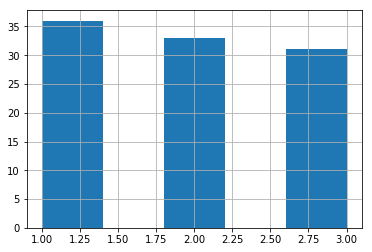

In [91]:
df.salaray.hist(bins=5)

In [93]:
# With the goal above, I will import just what I need. 
# The model to use (I already imported it above, but will do it again here so each example is self-contained)
from sklearn.ensemble import RandomForestRegressor

# The error metric. In this case, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# An efficient data structure. 
import pandas as pd

# Import the data
X = pd.read_csv("../data/dataset_HR3.csv")
y = X.pop("left_company")

In [94]:
X.columns

Index(['Sr. No. ', 'previous organisation1', 'previous organisation2',
       'previous organisation3', 'previous organisation_months1',
       'previous organisation_months2', 'previous organisation_months3',
       'salaray', 'position_grade'],
      dtype='object')

In [95]:
X.describe()

,Sr. No.,previous organisation1,previous organisation2,previous organisation3,previous organisation_months1,previous organisation_months2,previous organisation_months3,salaray,position_grade
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.370000,2.250000,2.38000,20.760000,23.850000,31.110000,1.950000,2.400000
std,29.011492,0.505625,0.687184,0.82609,12.788189,12.355324,18.184739,0.821123,1.110101
min,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,2.000000,1.000000,1.000000
25%,25.750000,1.000000,2.000000,2.00000,12.000000,15.000000,14.750000,1.000000,1.000000
50%,50.500000,1.000000,2.000000,3.00000,19.500000,22.000000,31.500000,2.000000,2.000000
75%,75.250000,2.000000,3.000000,3.00000,30.250000,32.250000,48.250000,3.000000,3.000000
max,100.000000,3.000000,3.000000,3.00000,56.000000,50.000000,60.000000,3.000000,4.000000


In [96]:
X["salaray"].fillna(X.salaray.mean(), inplace=True)

# Confirm the code is correct
X.describe()

,Sr. No.,previous organisation1,previous organisation2,previous organisation3,previous organisation_months1,previous organisation_months2,previous organisation_months3,salaray,position_grade
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.370000,2.250000,2.38000,20.760000,23.850000,31.110000,1.950000,2.400000
std,29.011492,0.505625,0.687184,0.82609,12.788189,12.355324,18.184739,0.821123,1.110101
min,1.000000,1.000000,1.000000,1.00000,2.000000,1.000000,2.000000,1.000000,1.000000
25%,25.750000,1.000000,2.000000,2.00000,12.000000,15.000000,14.750000,1.000000,1.000000
50%,50.500000,1.000000,2.000000,3.00000,19.500000,22.000000,31.500000,2.000000,2.000000
75%,75.250000,2.000000,3.000000,3.00000,30.250000,32.250000,48.250000,3.000000,3.000000
max,100.000000,3.000000,3.000000,3.00000,56.000000,50.000000,60.000000,3.000000,4.000000


In [97]:
numeric_variables = list(X.dtypes[X.dtypes != "object"].index)
X[numeric_variables].head()

,Sr. No.,previous organisation1,previous organisation2,previous organisation3,previous organisation_months1,previous organisation_months2,previous organisation_months3,salaray,position_grade
0,1,2,3,1,14,49,51,1,3
1,2,2,1,3,4,13,18,1,1
2,3,1,2,3,36,16,41,2,1
3,4,1,3,2,24,9,38,2,3
4,5,1,3,2,25,21,37,3,1


In [98]:
model = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=49)

In [99]:
model.fit(X[numeric_variables], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=49, verbose=0, warm_start=False)

In [100]:
model.oob_score_

-0.06549885298854785

In [101]:
y_oob = model.oob_prediction_
print("c-stat: ", roc_auc_score(y, y_oob))

c-stat:  0.5802230802230802


In [104]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [105]:
describe_categorical(X)

ValueError: Cannot describe a DataFrame without columns

In [106]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(X)

,Sr. No.,previous organisation1,previous organisation2,previous organisation3,previous organisation_months1,previous organisation_months2,previous organisation_months3,salaray,position_grade
0,1,2,3,1,14,49,51,1,3
1,2,2,1,3,4,13,18,1,1
2,3,1,2,3,36,16,41,2,1
3,4,1,3,2,24,9,38,2,3
4,5,1,3,2,25,21,37,3,1
...,...,...,...,...,...,...,...,...,...
95,96,1,2,3,26,19,54,2,2
96,97,2,3,1,18,21,3,1,3
97,98,1,3,2,12,22,49,3,3
98,99,1,2,3,12,14,55,1,1


In [107]:
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)
print ("C-stat: ", roc_auc_score(y, model.oob_prediction_))

C-stat:  0.5660660660660661


In [108]:
model.feature_importances_

array([0.24820951, 0.03678545, 0.03797122, 0.03692381, 0.21796368,
       0.1309177 , 0.17486543, 0.07151262, 0.04485059])

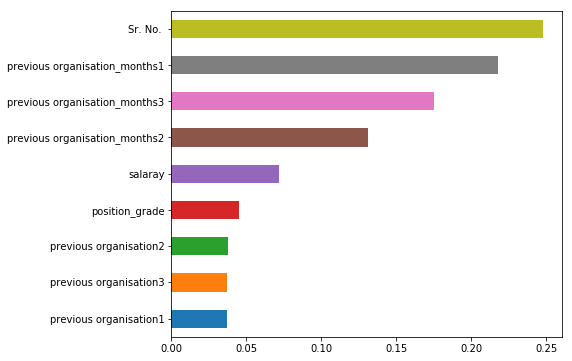

In [109]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,6));

In [111]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=1, random_state=42)
model.fit(X, y)

810 ms ± 136 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [112]:
%%timeit
model = RandomForestRegressor(1000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(X, y)

1.3 s ± 159 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


30 trees
C-stat:  0.5954525954525954

50 trees
C-stat:  0.574002574002574

100 trees
C-stat:  0.5660660660660661

200 trees
C-stat:  0.5501930501930503

500 trees
C-stat:  0.5557700557700558

1000 trees
C-stat:  0.5375375375375375

2000 trees
C-stat:  0.5298155298155298



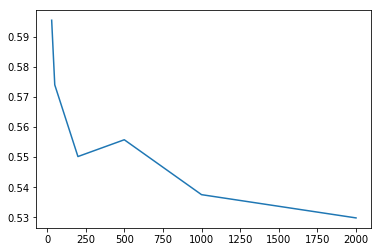

In [113]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(X, y)
    print (trees, "trees")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.5375375375375375

None option
C-stat:  0.5375375375375375

sqrt option
C-stat:  0.531960531960532

log2 option
C-stat:  0.531960531960532

0.9 option
C-stat:  0.5508365508365508

0.2 option
C-stat:  0.5261690261690262



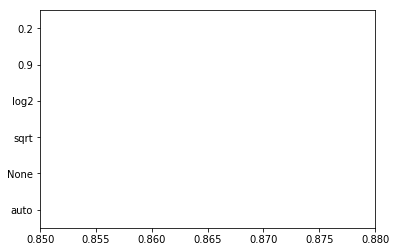

In [114]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    print (max_features, "option")
    roc = roc_auc_score(y, model.oob_prediction_)
    print ("C-stat: ", roc)
    results.append(roc)
    print ("")
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

In [115]:
model = RandomForestRegressor(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(X, y)
roc = roc_auc_score(y, model.oob_prediction_)
print ("C-stat: ", roc)

C-stat:  0.5637065637065637


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [120]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [122]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [129]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Accuracy = %0.2f" % accuracy_score (y_test, model.predict(X_test).round()))
print(classification_report(y_test, model.predict(X_test).round()))

Accuracy = 0.64
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.50      0.33      0.40         9

   micro avg       0.64      0.64      0.64        25
   macro avg       0.59      0.57      0.57        25
weighted avg       0.62      0.64      0.62        25



In [130]:
pickle.dump(rfc, open("hr_data_ml.pkl", "wb"))

NameError: name 'pickle' is not defined

In [131]:
import pickle
#conda install requests will be needed
import requests, json


In [133]:
pickle.dump(model, open("hr_data_ml.pkl", "wb"))

In [134]:
my_random_forest = pickle.load(open("hr_data_ml.pkl", "rb"))

In [135]:
my_random_forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [136]:
print(classification_report(y_test, my_random_forest.predict(X_test).round()))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.50      0.33      0.40         9

   micro avg       0.64      0.64      0.64        25
   macro avg       0.59      0.57      0.57        25
weighted avg       0.62      0.64      0.62        25



In [140]:
X.columns

Index(['Sr. No. ', 'previous organisation1', 'previous organisation2',
       'previous organisation3', 'previous organisation_months1',
       'previous organisation_months2', 'previous organisation_months3',
       'salaray', 'position_grade'],
      dtype='object')